In [1]:
import sys
sys.path.append('..')

import numpy as np
from plane_ransac import CudaRansac

from util import generate_planar_cloud, plot_point_clouds

Here we create four point clouds, each one is a plane but with some noise, which is determined by `sigma`, and with some outliers, the ratio of which is determined by `outlier ratio`

In [2]:

points_number = 1000
corner = np.array([0, 0, 0])
edge_length = 5
sigma = 0.1
outlier_ratio = 0.25

pcs = [
    generate_planar_cloud(
        points_number=points_number,
        plane_coefficients=(1, 2, 3, 0.5),
        voxel_corner=np.array([0, 0, 0]),
        edge_length=5,
        sigma=sigma,
        outlier_ratio=outlier_ratio,
    ),
    generate_planar_cloud(
        points_number=points_number,
        plane_coefficients=(1, 2, 3, 0.5),
        voxel_corner=np.array([5, 0, 0]),
        edge_length=5,
        sigma=sigma,
        outlier_ratio=outlier_ratio,
    ),
    generate_planar_cloud(
        points_number=points_number,
        plane_coefficients=(1, -2, 3, 0.5),
        voxel_corner=np.array([0, 5, 0]),
        edge_length=5,
        sigma=sigma,
        outlier_ratio=outlier_ratio,
    ),
    generate_planar_cloud(
        points_number=points_number,
        plane_coefficients=(-1, 2, 3, 0.5),
        voxel_corner=np.array([5, 5, 0]),
        edge_length=5,
        sigma=sigma,
        outlier_ratio=outlier_ratio,
    ),
]


We can see that the clouds are planar but noisy

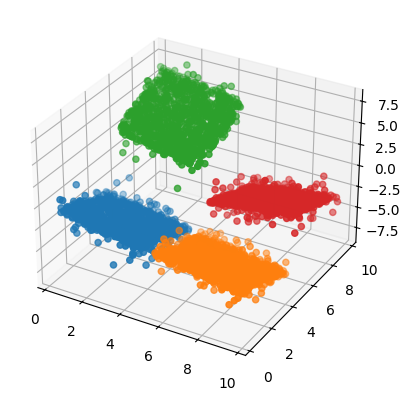

In [3]:
plot_point_clouds(pcs)

Using `CudaRansac.evaluate_point_masks` we can find the masks for the inliers and after applying the masks we get the clouds without the outliers

In [4]:
cuda_ransac = CudaRansac(threshold=0.1)

masks = cuda_ransac.evaluate_point_masks(pcs)

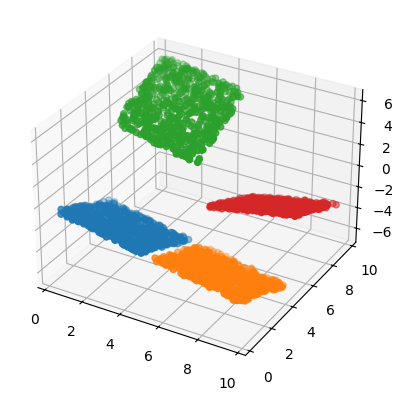

In [5]:
pcs_masked = [pc[mask] for pc, mask in zip(pcs, masks)]
plot_point_clouds(pcs_masked)